###EMPLOYEE ATTRITION PREDICTION PROJECT
By: Mehak Arora (03601192023), AI/ML, 4th sem

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/Employee Attrition Project/dataset.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv(file_path)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#dropping duplicates
data.drop_duplicates(inplace=True)

# Find columns with only one unique value
unique=data.nunique()
same_value=unique[unique==1].index.to_list()
print(same_value)
#dropping these columns
data=data.drop(same_value,axis=1)
#dropping marital status,Employee Number-unnecessary
data=data.drop(["MaritalStatus","EmployeeNumber"],axis=1)
#dropping Gender-In Accordance with chi-square test
data=data.drop("Gender",axis=1)
#Converting Attrition columns to int type
data['Attrition']=data['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
#Dropping the mentioned columns
data=data.drop(["PerformanceRating","HourlyRate","PercentSalaryHike","JobLevel"],axis=1)
#separating categorical data from the data for furthur processing
def separate(data):
  cat_data_columns=data.select_dtypes(include=["object"]).columns
  cat_data=data[cat_data_columns]
  return cat_data
cat_data=separate(data)
data=data.drop(cat_data.columns,axis=1)
print(cat_data.head())
#overtime-binary classification
cat_data["OverTime"]=cat_data["OverTime"].apply(lambda x:0 if x=="No" else 1)
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
#JobRole, EducationField,Department,BusinessTravel require encoding
for column in ["JobRole", "EducationField","Department","BusinessTravel"]:
    cat_data[column] = label_encoder.fit_transform(cat_data[column])
#EXTRACTING THE DEPENDENT VARIABLE(Attrition)
y=data["Attrition"]
data.drop("Attrition",axis=1,inplace=True)
# MERIGING cat_data ,cat_data_dummies to the original dataset-to get our matrix of features
X=pd.concat([data,cat_data],axis=1)
X.head()

['EmployeeCount', 'Over18', 'StandardHours']
      BusinessTravel              Department EducationField  \
0      Travel_Rarely                   Sales  Life Sciences   
1  Travel_Frequently  Research & Development  Life Sciences   
2      Travel_Rarely  Research & Development          Other   
3  Travel_Frequently  Research & Development  Life Sciences   
4      Travel_Rarely  Research & Development        Medical   

                 JobRole OverTime  
0        Sales Executive      Yes  
1     Research Scientist       No  
2  Laboratory Technician      Yes  
3     Research Scientist      Yes  
4  Laboratory Technician       No  


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,EducationField,JobRole,OverTime
0,41,1102,1,2,2,3,4,5993,19479,8,...,1,6,4,0,5,2,2,1,7,1
1,49,279,8,1,3,2,2,5130,24907,1,...,3,10,7,1,7,1,1,1,6,0
2,37,1373,2,2,4,2,3,2090,2396,6,...,3,0,0,0,0,2,1,4,2,1
3,33,1392,3,4,4,3,3,2909,23159,1,...,3,8,7,3,0,1,1,1,6,1
4,27,591,2,1,1,3,2,3468,16632,9,...,3,2,2,2,2,2,1,3,2,0


## Testing model on RAW dataset


In [ ]:
#Creating a function(helper), to evaluate model
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_auc_score
def helper(X_train,X_test,y_train,y_test,model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"=======================Model: SVC ==========================")
    print(f"              Accuracy: {accuracy_score(y_test,y_pred)}")
    ROCAUCscore = roc_auc_score(y_test, y_pred)
    print(f"              AUC-ROC Curve : {ROCAUCscore:.4f}")
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print()

    fpr, tpr, thresholds=roc_curve(y_test, y_pred)
    roc_auc=auc(fpr, tpr)
    #Plotting ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

=======================Model: SVC ==========================
              Accuracy: 0.8401360544217688
              AUC-ROC Curve : 0.5000
[[247   0]
 [ 47   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


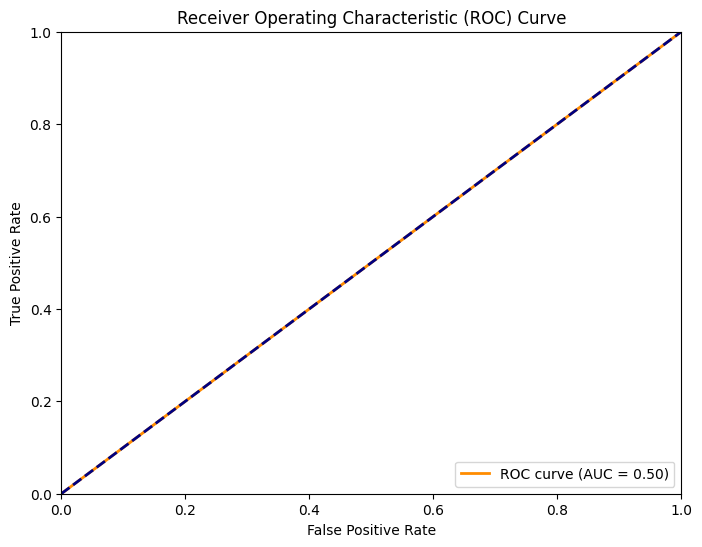

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)
helper(X_train,X_test,y_train,y_test,SVC())


#PCA and RandomizedSearchCV
Applying the function for raw data


In [ ]:
#evaluate_model function will be used henceforth insead of helper
def evaluate_model(X_test,y_test,model):
    y_pred=model.predict(X_test)
    print(f"=======================Model: SVC ==========================")
    print(f"              Accuracy: {accuracy_score(y_test,y_pred)}")
    ROCAUCscore = roc_auc_score(y_test, y_pred)
    print(f"              AUC-ROC Curve : {ROCAUCscore:.4f}")
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print()

    fpr, tpr, thresholds=roc_curve(y_test, y_pred)
    roc_auc=auc(fpr, tpr)
    #Plotting ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

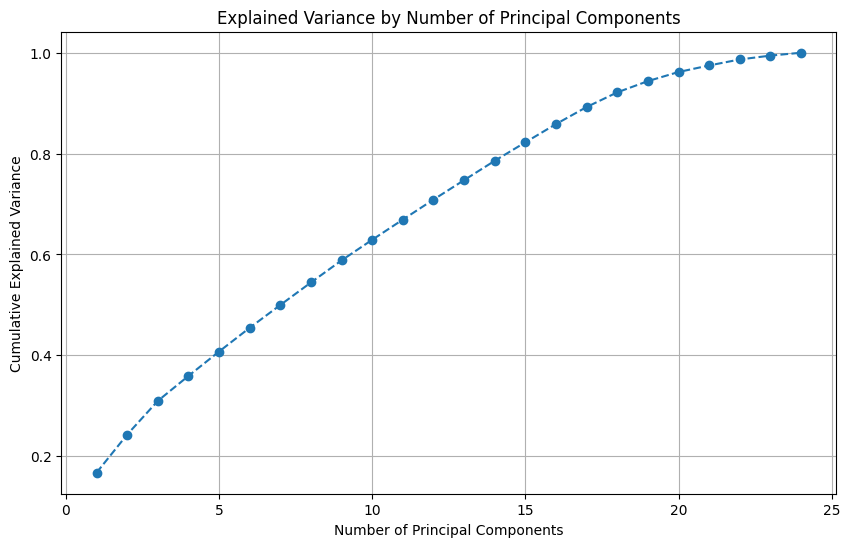


Best Parameters: {'pca__n_components': 15, 'model__kernel': 'rbf', 'model__C': 1}

=======================Model: SVC ==========================
              Accuracy: 0.8571428571428571
              AUC-ROC Curve : 0.5790
[[244   3]
 [ 39   8]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       247
           1       0.73      0.17      0.28        47

    accuracy                           0.86       294
   macro avg       0.79      0.58      0.60       294
weighted avg       0.84      0.86      0.82       294




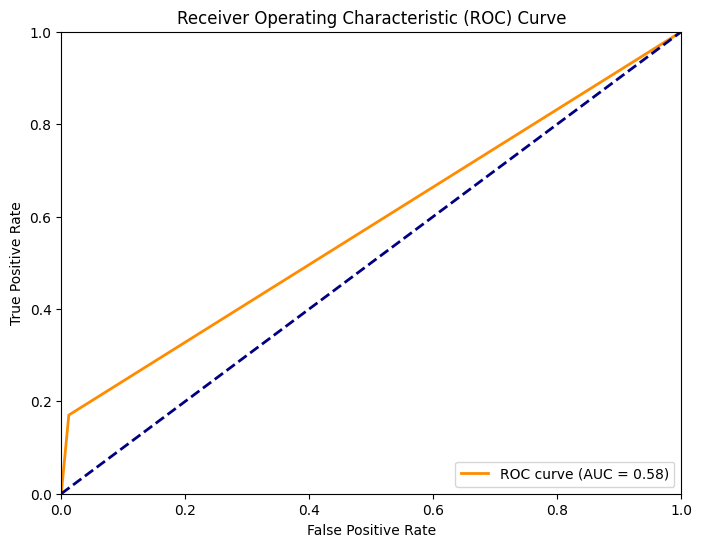

In [ ]:
#sampled_dataset_results: It is a function that accepts X,y(which will be modified later for managing imbalance in data) and applies StandardScaling, PCA and RandomizedSearchCV
#Pipelining is used

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

classifier=SVC()

def sampled_dataset_results(X,y,classifier):
  #Separating training set and test set
  X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

  #SCALING NUMERICAL FEATURES
  from sklearn.preprocessing import StandardScaler
  scaler=StandardScaler()
  X_train_scaled=scaler.fit_transform(X_train)

  #APPLYING PCA
  from sklearn.decomposition import PCA
  pca=PCA()
  X_train_pca=pca.fit_transform(X_train_scaled)

  # Plot explained variance
  plt.figure(figsize=(10, 6))
  plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         marker='o', linestyle='--')
  plt.xlabel('Number of Principal Components')
  plt.ylabel('Cumulative Explained Variance')
  plt.title('Explained Variance by Number of Principal Components')
  plt.grid(True)
  plt.show()
  print()

  #Defining pipelining with chosen number of compnents
  pipeline=Pipeline([
      ("scaler",StandardScaler()),
      ("pca",PCA()),
      ("model",classifier)
  ])

  # Define the parameter grid for RandomizedSearchCV
  param_distributions = {
    'pca__n_components': [5, 10, 15, 20],
    'model__C':[0.001,0.01,0.1,1,10,100,1000],
    'model__kernel':['linear','rbf','poly']
  }


  # Create a RandomizedSearchCV object
  random_search = RandomizedSearchCV(pipeline, param_distributions, cv=5, n_jobs=-1)
  random_search.fit(X_train, y_train)

  # Get the best model and its parameters
  best_model = random_search.best_estimator_
  best_params = random_search.best_params_
  print(f"Best Parameters: {best_params}")
  print()

  # Evaluate the best model on the test set
  evaluate_model(X_test,y_test,best_model)


sampled_dataset_results(X,y,classifier)

#It can be inferred that we have an IMBALANCED DATASET
###The model performs better for the majority class (class 0) but struggles with the minority class (class 1). The lower recall for class 1 indicates that the model does not identify many of the actual class 1 cases.

# OVERSAMPLING


## Random Oversampling








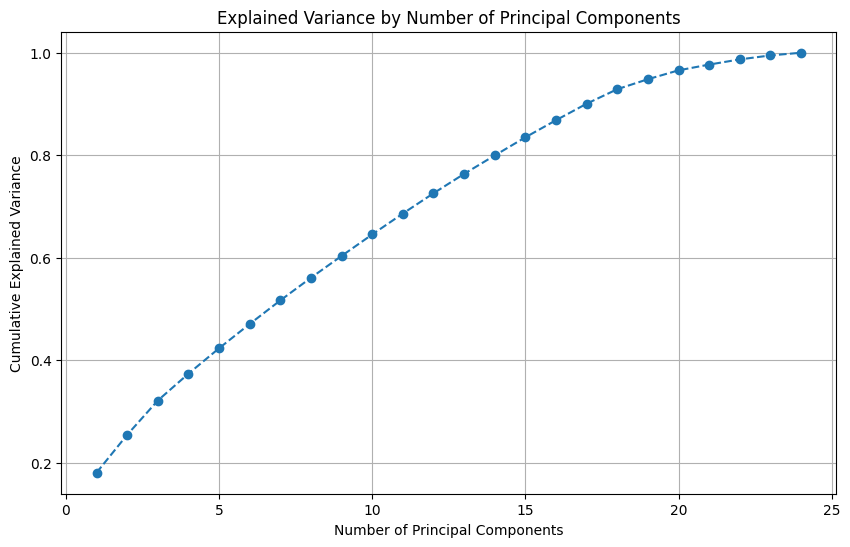


Best Parameters: {'pca__n_components': 10, 'model__kernel': 'rbf', 'model__C': 100}

=======================Model: SVC ==========================
              Accuracy: 0.9109311740890689
              AUC-ROC Curve : 0.9109
[[210  37]
 [  7 240]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       247
           1       0.87      0.97      0.92       247

    accuracy                           0.91       494
   macro avg       0.92      0.91      0.91       494
weighted avg       0.92      0.91      0.91       494




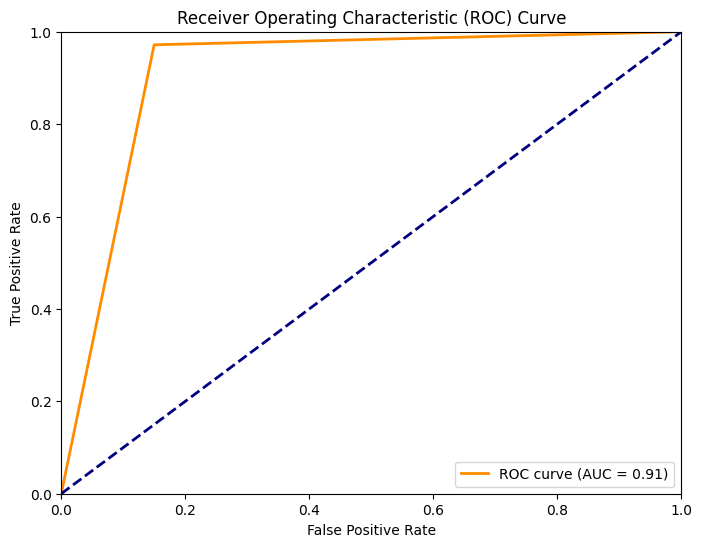

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
X_resampled,y_resampled=ros.fit_resample(X,y)

sampled_dataset_results(X_resampled,y_resampled,classifier)

## SMOTE-Synthetic Minority Oversampling Technique








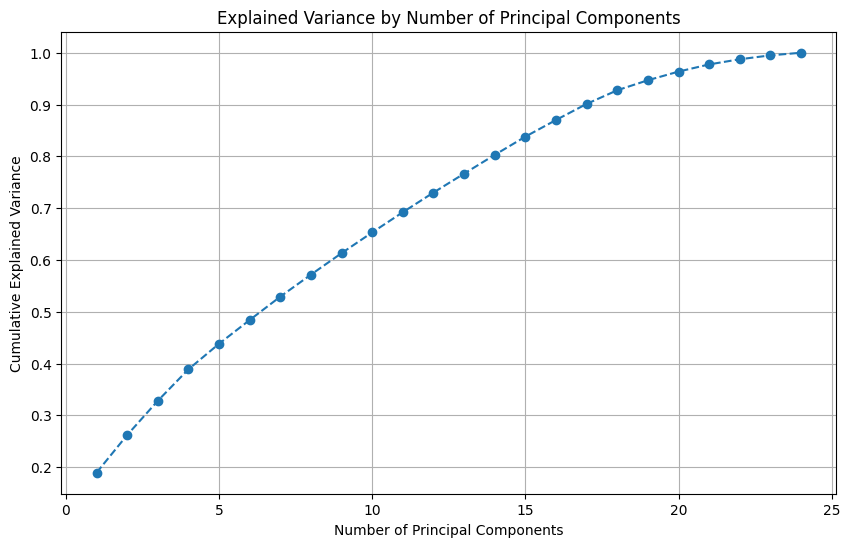


Best Parameters: {'pca__n_components': 20, 'model__kernel': 'poly', 'model__C': 1}

=======================Model: SVC ==========================
              Accuracy: 0.8704453441295547
              AUC-ROC Curve : 0.8704
[[200  47]
 [ 17 230]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       247
           1       0.83      0.93      0.88       247

    accuracy                           0.87       494
   macro avg       0.88      0.87      0.87       494
weighted avg       0.88      0.87      0.87       494




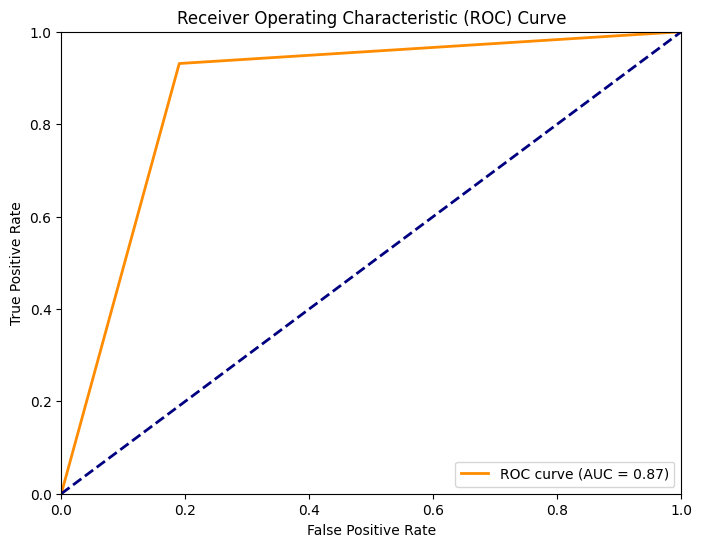

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0,k_neighbors=5)
X_resampled,y_resampled=sm.fit_resample(X,y)

sampled_dataset_results(X_resampled,y_resampled,classifier)

## ADASYN-Adaptive Synthetic Sampling








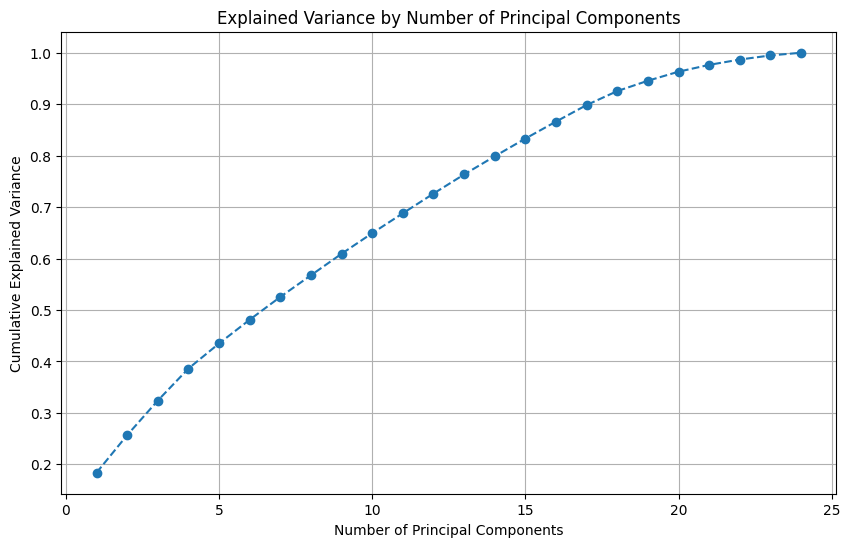


Best Parameters: {'pca__n_components': 20, 'model__kernel': 'rbf', 'model__C': 1}

=======================Model: SVC ==========================
              Accuracy: 0.8622129436325678
              AUC-ROC Curve : 0.8614
[[219  28]
 [ 38 194]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       247
           1       0.87      0.84      0.85       232

    accuracy                           0.86       479
   macro avg       0.86      0.86      0.86       479
weighted avg       0.86      0.86      0.86       479




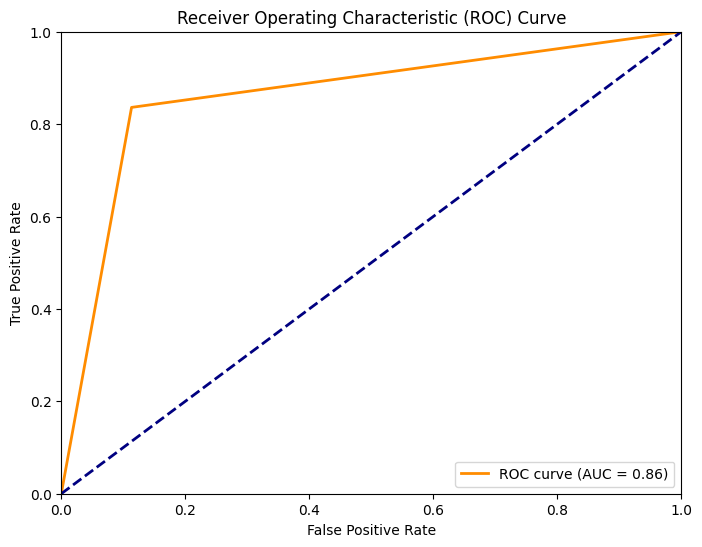

In [ ]:
from imblearn.over_sampling import ADASYN
ad=ADASYN(random_state=0,n_neighbors=5)
X_resampled,y_resampled=ad.fit_resample(X,y)

sampled_dataset_results(X_resampled,y_resampled,classifier)

# UNDERSAMPLING


## Random UnderSampling








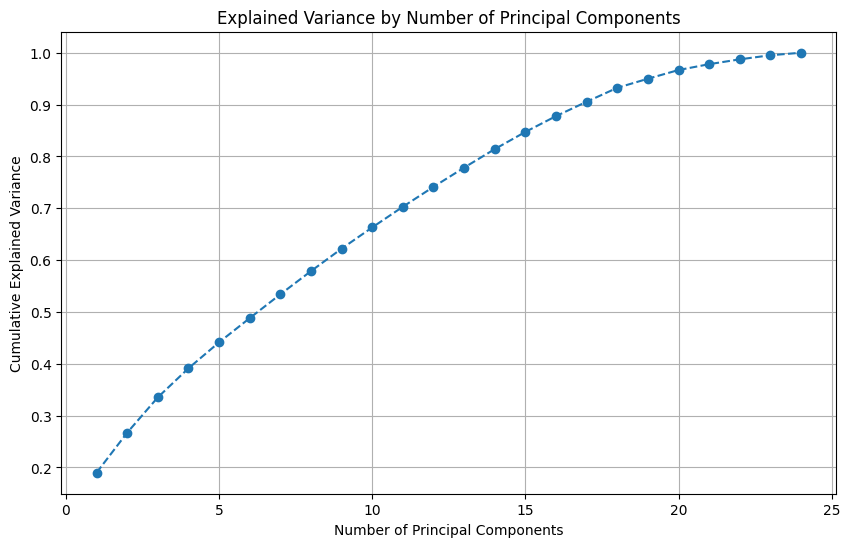


Best Parameters: {'pca__n_components': 15, 'model__kernel': 'rbf', 'model__C': 1}

=======================Model: SVC ==========================
              Accuracy: 0.7052631578947368
              AUC-ROC Curve : 0.7055
[[33 15]
 [13 34]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.70        48
           1       0.69      0.72      0.71        47

    accuracy                           0.71        95
   macro avg       0.71      0.71      0.71        95
weighted avg       0.71      0.71      0.71        95




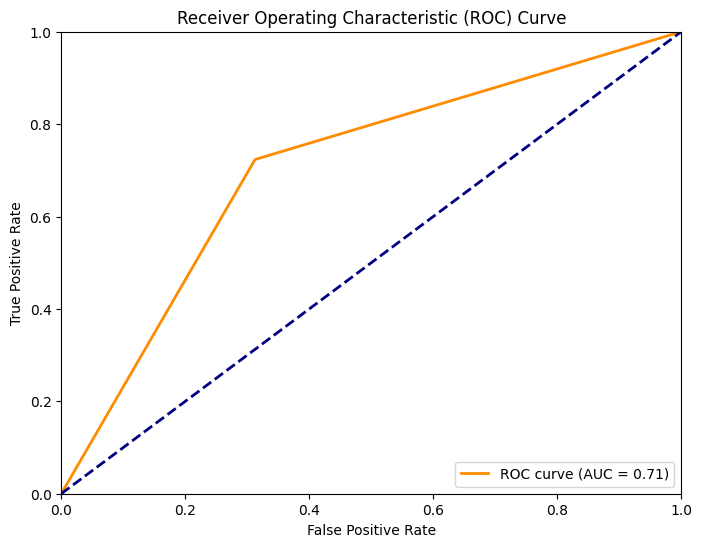

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=0)
X_resampled,y_resampled=rus.fit_resample(X,y)

sampled_dataset_results(X_resampled,y_resampled,classifier)

##Tomek Links






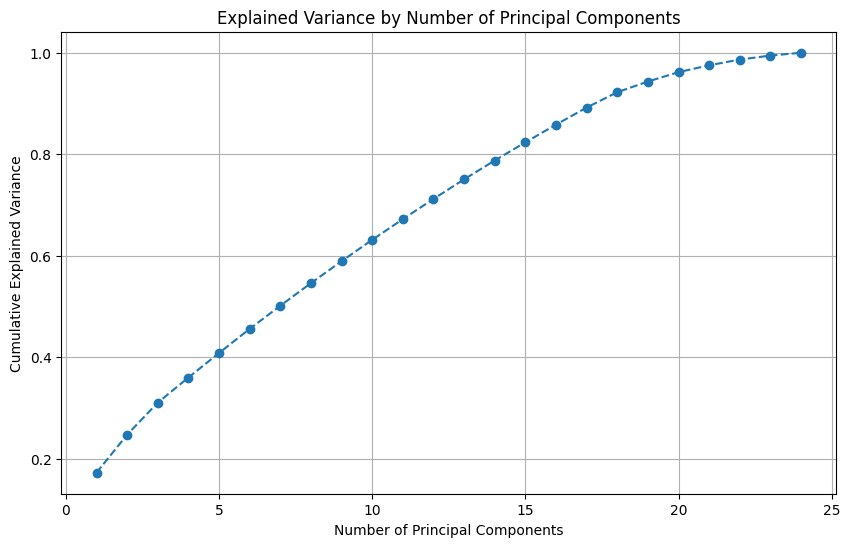


Best Parameters: {'pca__n_components': 10, 'model__kernel': 'rbf', 'model__C': 0.01}

=======================Model: SVC ==========================
              Accuracy: 0.8248175182481752
              AUC-ROC Curve : 0.5000
[[226   0]
 [ 48   0]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       226
           1       0.00      0.00      0.00        48

    accuracy                           0.82       274
   macro avg       0.41      0.50      0.45       274
weighted avg       0.68      0.82      0.75       274




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


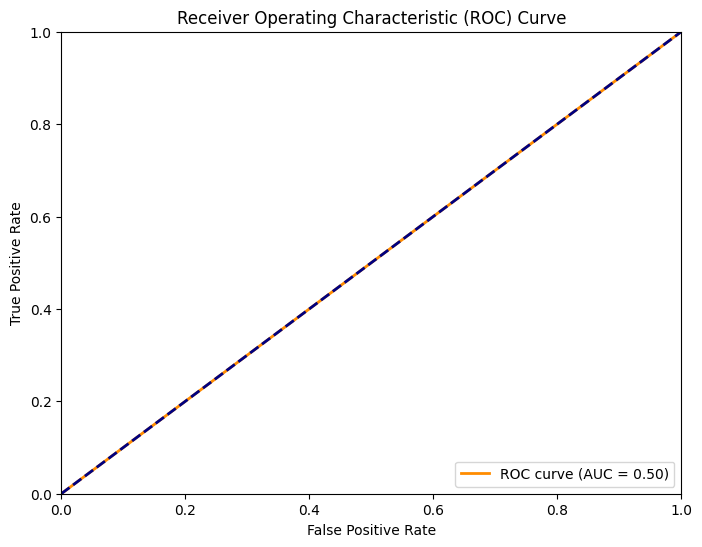

In [ ]:
from imblearn.under_sampling import TomekLinks
tl=TomekLinks(sampling_strategy='majority')
X_resampled,y_resampled=tl.fit_resample(X,y)

sampled_dataset_results(X_resampled,y_resampled,classifier)

## Edited Nearest Neighbors (ENN)







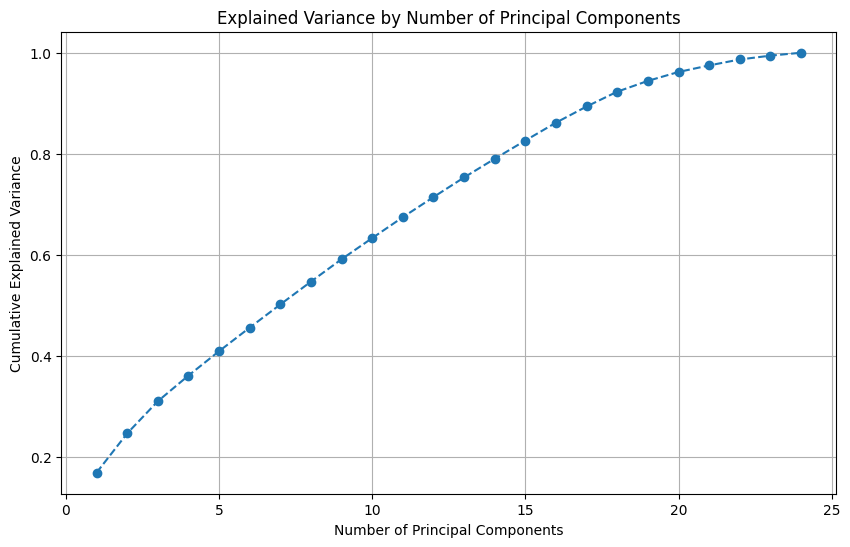


Best Parameters: {'pca__n_components': 10, 'model__kernel': 'rbf', 'model__C': 1}

=======================Model: SVC ==========================
              Accuracy: 0.7971014492753623
              AUC-ROC Curve : 0.5832
[[156   4]
 [ 38   9]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       160
           1       0.69      0.19      0.30        47

    accuracy                           0.80       207
   macro avg       0.75      0.58      0.59       207
weighted avg       0.78      0.80      0.75       207




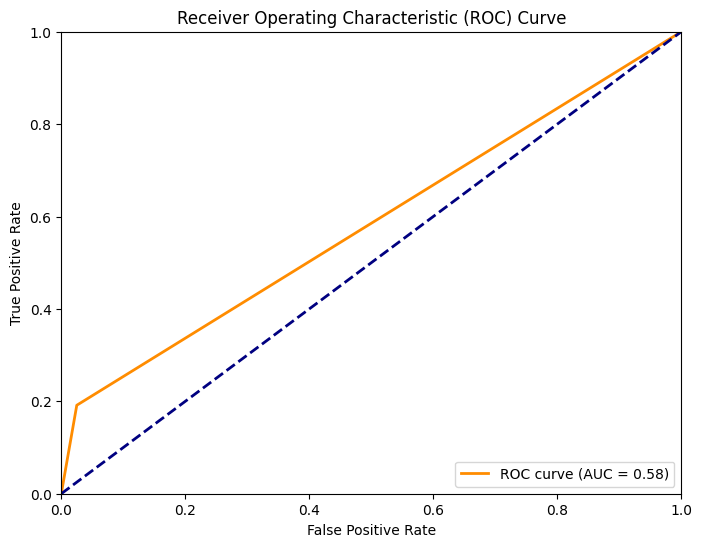

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours
enn=EditedNearestNeighbours(sampling_strategy='majority')
X_resampled,y_resampled=enn.fit_resample(X,y)

sampled_dataset_results(X_resampled,y_resampled,classifier)

# HYBRID


## SMOTE-TomekLinks






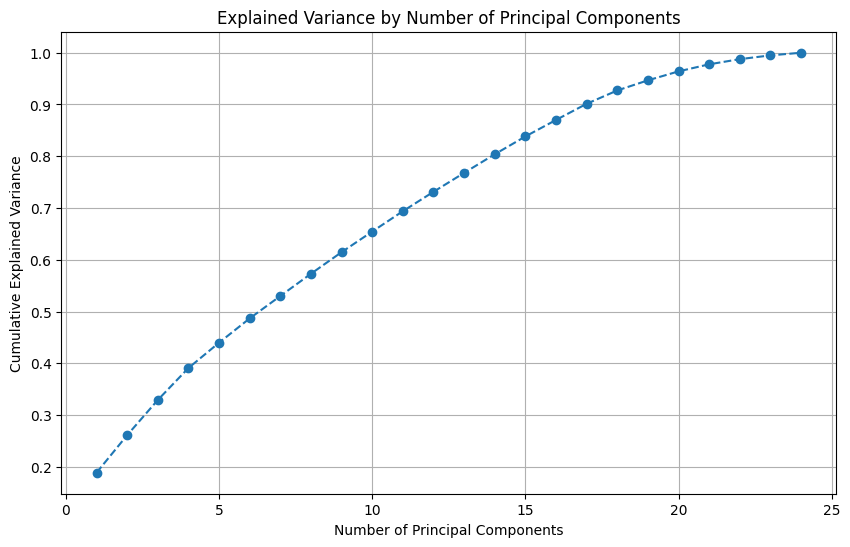


Best Parameters: {'pca__n_components': 15, 'model__kernel': 'rbf', 'model__C': 10}

=======================Model: SVC ==========================
              Accuracy: 0.8653846153846154
              AUC-ROC Curve : 0.8654
[[200  34]
 [ 29 205]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       234
           1       0.86      0.88      0.87       234

    accuracy                           0.87       468
   macro avg       0.87      0.87      0.87       468
weighted avg       0.87      0.87      0.87       468




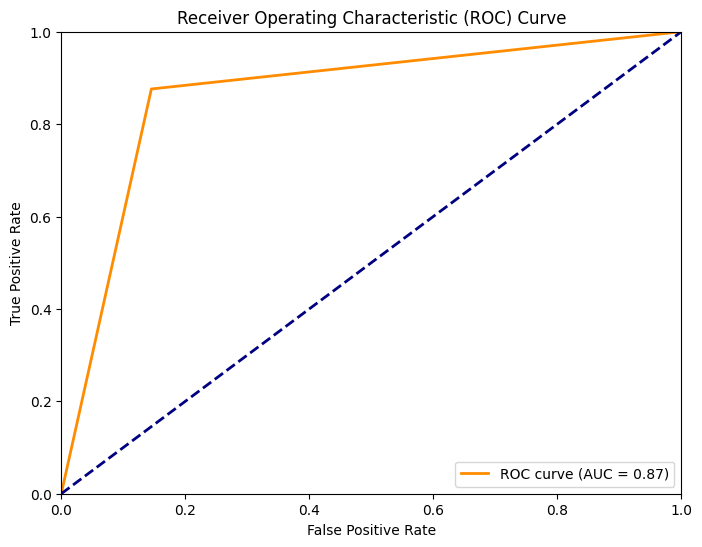

In [ ]:
from imblearn.combine import SMOTETomek
smotetomek = SMOTETomek(random_state=0)
X_resampled,y_resampled=smotetomek.fit_resample(X,y)
sampled_dataset_results(X_resampled,y_resampled,classifier)

##  SMOTE-ENN






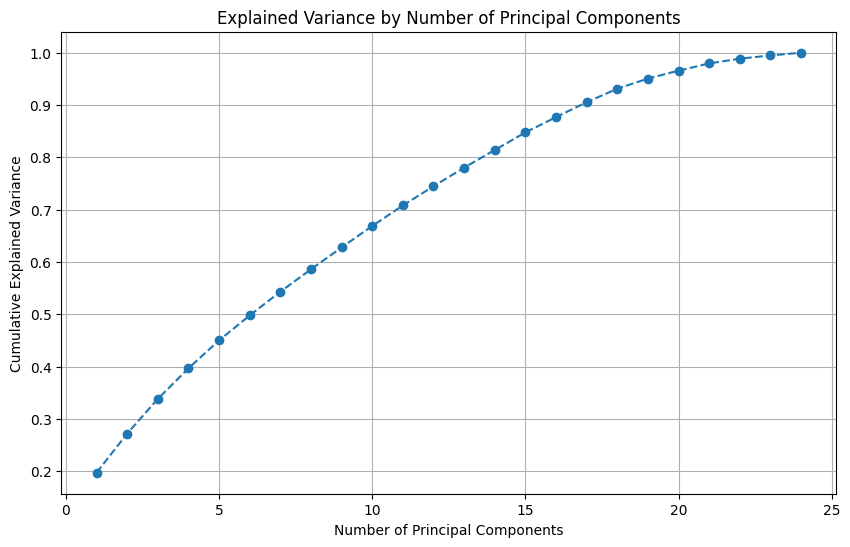


Best Parameters: {'pca__n_components': 10, 'model__kernel': 'rbf', 'model__C': 10}

=======================Model: SVC ==========================
              Accuracy: 0.8605442176870748
              AUC-ROC Curve : 0.8595
[[109  19]
 [ 22 144]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       128
           1       0.88      0.87      0.88       166

    accuracy                           0.86       294
   macro avg       0.86      0.86      0.86       294
weighted avg       0.86      0.86      0.86       294




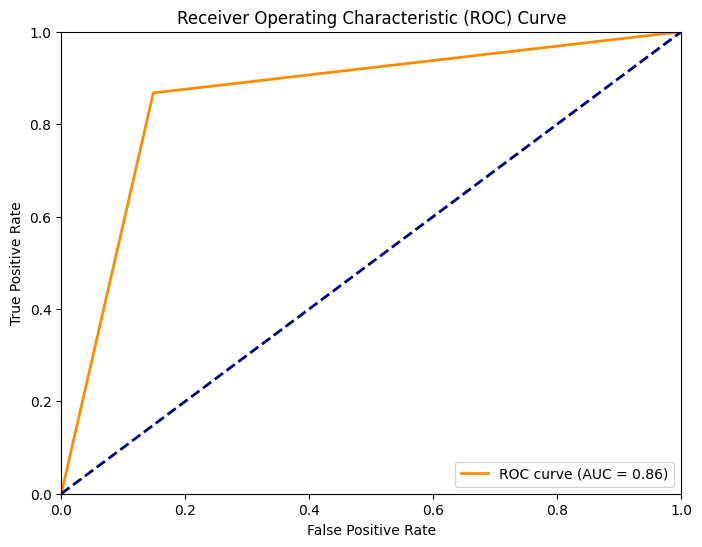

In [ ]:
from imblearn.combine import SMOTEENN
smoteenn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smoteenn.fit_resample(X, y)
sampled_dataset_results(X_resampled, y_resampled,classifier)